In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Projeto de Classificação

In [3]:
## Informações de pacientes, o objetivo é classificar em doente ou saudável

n_persons = 10000
#0: Saudável
#1: Doente

data = {
    'Idade': np.random.randint(20, 80, n_persons),
    'IMC': np.random.uniform(10,40, n_persons),
    'Nivel de Glicose': np.random.uniform(70, 200, n_persons),
    'Pressao': np.random.uniform(60, 80, n_persons),
    'Temperatura': np.random.uniform(35, 40, n_persons),
    'Estado': np.random.choice([0,1], size=n_persons, p=[0.5, 0.5])
}

In [4]:
df = pd.DataFrame(data) #Convertendo dicionário para dataframe
df

,Idade,IMC,Nivel de Glicose,Pressao,Temperatura,Estado
0,69,29.320303,101.261006,78.148408,37.916689,0
1,43,34.293437,123.727623,66.596135,39.571746,0
2,43,25.452867,182.028936,77.159928,39.228792,0
3,70,22.488519,106.632363,66.358194,35.755524,0
4,29,26.479423,119.997291,79.916268,36.881797,1
...,...,...,...,...,...,...
9995,63,32.999305,143.870482,72.637372,39.160586,0
9996,42,19.014935,120.513067,60.333602,38.659672,0
9997,52,26.207753,177.342740,70.112160,37.510688,0
9998,71,22.448048,183.915055,75.905681,39.953611,1


In [5]:
df.describe(

)

,Idade,IMC,Nivel de Glicose,Pressao,Temperatura,Estado
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.72100,25.037524,134.742346,69.978098,37.491882,0.495100
std,17.43973,8.630551,37.714784,5.795474,1.442208,0.500001
min,20.00000,10.002204,70.000307,60.007008,35.000378,0.000000
25%,35.00000,17.580850,101.600474,64.925794,36.244351,0.000000
50%,50.00000,25.127891,134.403277,69.966963,37.504696,0.000000
75%,65.00000,32.545901,167.715930,75.028656,38.714326,1.000000
max,79.00000,39.998159,199.995686,79.999413,39.998195,1.000000


In [7]:
df.isnull().sum()

Idade               0
IMC                 0
Nivel de Glicose    0
Pressao             0
Temperatura         0
Estado              0
dtype: int64

In [ ]:
## Adicionar valores nulos de propósito

columns_to_add_nan = ['Temperatura', 'IMC']

for col in columns_to_add_nan: ##
    selected_person_index = np.random.choice(df.index, size=500)
    df.loc[selected_person_index, col] = np.nan

In [9]:
df.isnull().sum()

Idade                 0
IMC                 487
Nivel de Glicose      0
Pressao               0
Temperatura         486
Estado                0
dtype: int64

In [10]:
size_outliers = 100
outlier_temp_high = np.random.uniform(40, 50, size_outliers)
outlier_temp_low = np.random.uniform(15, 35, size_outliers)
selected_person_index_temp = np.random.choice(df.index, size=size_outliers)
df.loc[selected_person_index_temp, 'Temperatura'] = outlier_temp_high

selected_person_index_temp = np.random.choice(df.index, size=size_outliers)
df.loc[selected_person_index_temp, 'Temperatura'] = outlier_temp_low

### Análise Exploratória

In [11]:
## Verificar se o dataframe tem valores nulos

df.describe()

,Idade,IMC,Nivel de Glicose,Pressao,Temperatura,Estado
count,10000.00000,9513.000000,10000.000000,10000.000000,9522.000000,10000.000000
mean,49.72100,25.045853,134.742346,69.978098,37.458654,0.495100
std,17.43973,8.618631,37.714784,5.795474,2.124537,0.500001
min,20.00000,10.002204,70.000307,60.007008,15.162662,0.000000
25%,35.00000,17.589344,101.600474,64.925794,36.228054,0.000000
50%,50.00000,25.149554,134.403277,69.966963,37.516235,0.000000
75%,65.00000,32.535784,167.715930,75.028656,38.772286,1.000000
max,79.00000,39.998159,199.995686,79.999413,49.924589,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Idade             10000 non-null  int64  
 1   IMC               9513 non-null   float64
 2   Nivel de Glicose  10000 non-null  float64
 3   Pressao           10000 non-null  float64
 4   Temperatura       9522 non-null   float64
 5   Estado            10000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 468.9 KB


/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


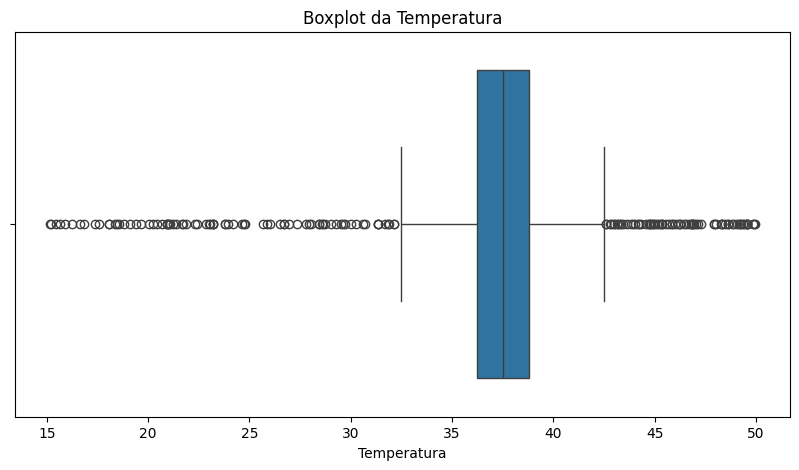

In [13]:
plt.figure(figsize=[10,5]);
sns.boxplot(x=df['Temperatura']);
plt.title('Boxplot da Temperatura');

In [14]:
## O que fazer com dados faltantes?
## Podemos substituir os valores faltantes pela média ou mediana
df.fillna(df.median(), inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Idade             10000 non-null  int64  
 1   IMC               10000 non-null  float64
 2   Nivel de Glicose  10000 non-null  float64
 3   Pressao           10000 non-null  float64
 4   Temperatura       10000 non-null  float64
 5   Estado            10000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 468.9 KB


### Pré-Processamento dos dados

In [158]:
df.head()

,Idade,IMC,Nivel de Glicose,Pressao,Temperatura,Estado
0,41,10.265684,99.849644,60.774265,35.005951,0
1,31,29.249874,137.359735,70.053028,37.326140,0
2,71,15.422324,130.446392,71.184012,38.453074,1
3,59,35.103688,111.424026,64.570048,37.939929,1
4,64,31.482174,138.062939,69.345169,35.017729,0


In [16]:
#Divisão em atributos e rótulos
X = df.drop(columns=['Estado'])
y = df['Estado']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
## Quem lembra da discussão da aula passada?
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Treinar os modelos de classificação

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Definir os hiperparâmetros para buscar os melhores valores
param_grid = {
    'n_estimators': [300,500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid,
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)


grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_
print("Melhores Hiperparâmetros:", grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  12.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  12.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  13.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  14.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  14.9s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  14.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  16.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   6.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; tota

In [20]:
rf = grid_search.best_estimator_

In [21]:
y_pred = rf.predict(X_test_scaled)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1024
           1       0.48      0.49      0.49       976

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



### Avaliar a qualidade/desempenho do modelo

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1024
           1       0.48      0.49      0.49       976

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



Text(70.72222222222221, 0.5, 'true')

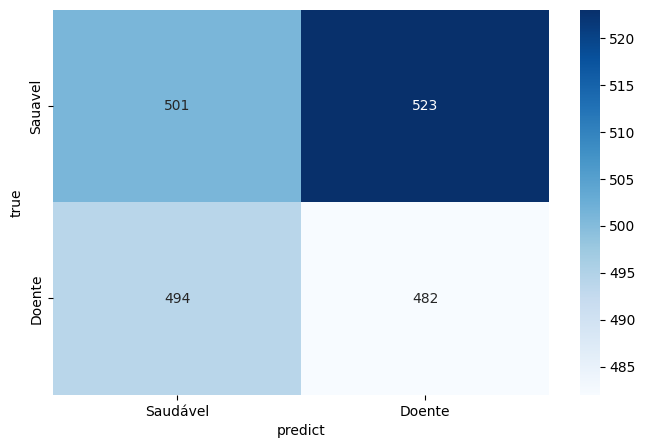

In [24]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=[8,5])
sns.heatmap(cf_matrix, annot=True, fmt='d', xticklabels=['Saudável', 'Doente'], yticklabels=['Sauavel', 'Doente'], cmap='Blues')
plt.xlabel('predict')
plt.ylabel('true')

Text(70.72222222222221, 0.5, 'true')

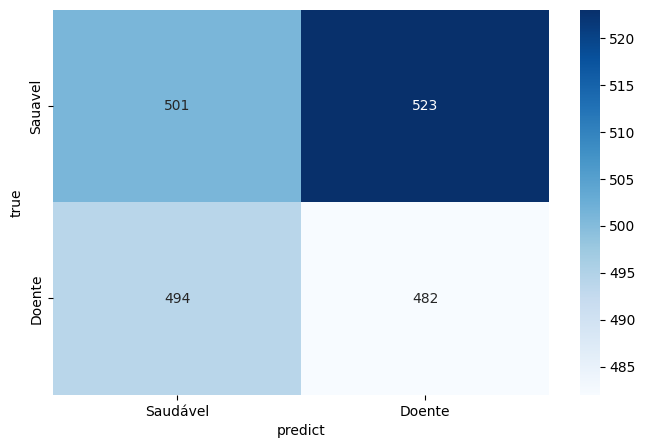

In [25]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=[8,5])
sns.heatmap(cf_matrix, annot=True, fmt='d', xticklabels=['Saudável', 'Doente'], yticklabels=['Sauavel', 'Doente'], cmap='Blues')
plt.xlabel('predict')
plt.ylabel('true')

### Testar outros modelos de classificação